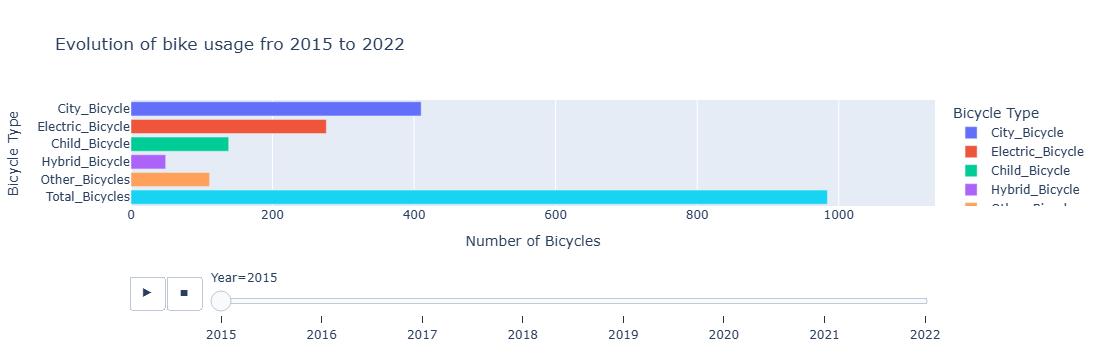

In [7]:
import pandas as pd
import plotly.express as px


data_bicycles = {
    'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'City_Bicycle': [410, 402, 399, 341, 331, 286, 231, 195],
    'Electric_Bicycle': [276, 271, 294, 409, 423, 547, 480, 486],
    'Child_Bicycle': [138, 109, 116, 107, 110, 110, 83, 79],
    'Hybrid_Bicycle': [49, 54, 51, 44, 40, 36, 28, 19],
    'Other_Bicycles': [111, 92, 97, 111, 106, 107, 102, 75]
}


df = pd.DataFrame(data_bicycles)
df['Total_Bicycles'] = df[['City_Bicycle', 'Electric_Bicycle', 'Child_Bicycle', 'Hybrid_Bicycle', 'Other_Bicycles']].sum(axis=1)    #Total bike bar calculated as the sum of each type of bike for year
df_melted = df.melt(id_vars='Year', value_vars=['City_Bicycle', 'Electric_Bicycle', 'Child_Bicycle', 'Hybrid_Bicycle', 'Other_Bicycles', 'Total_Bicycles'], 
                    var_name='Bicycle Type', value_name='Number of Bicycles')


fig = px.bar(df_melted, 
             x='Number of Bicycles', 
             y='Bicycle Type', 
             color='Bicycle Type', 
             animation_frame='Year', 
             orientation='h', 
             title="Evolution of bike usage fro 2015 to 2022", 
             range_x=[0, df_melted['Number of Bicycles'].max() + 50])
fig.show()

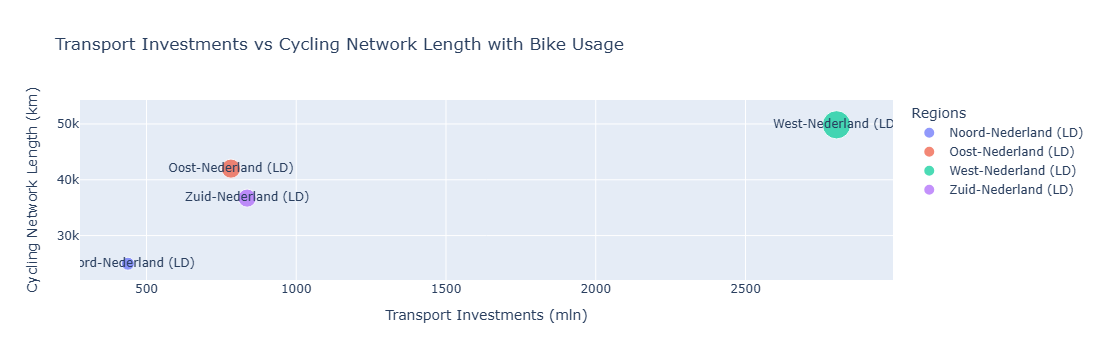

In [42]:
import pandas as pd
import plotly.express as px


file_investment = r'D:\Git\Python-project\Municipal_budgets__income_and_expenditures_by_region_and_size_class_14102024_204722.csv'
file_network = r'D:\Git\Python-project\Lengte_van_fietsnetwerk__fietswegkenmerken__regio__02112024_172141.csv'
file_travels = r'D:\Git\Python-project\Total_transport_performance_in_the_Netherlands__modes_of_travel_and_regions_14102024_194424.csv'
df_investment = pd.read_csv(file_investment, delimiter = ';')
df_network = pd.read_csv(file_network, delimiter = ';')
df_travels = pd.read_csv(file_travels, delimiter = ';')

df_investment = df_investment[['Total traffic, transportation and wate..', 'Regions']]
df_network = df_network[['Total cycle network length', 'Regions']]
df_travels = df_travels[['Bike', 'Regions']]

df = pd.merge(df_investment, df_network, on = 'Regions')
df = pd.merge(df, df_travels, on = 'Regions')

fig = px.scatter(
    df, 
    x='Total traffic, transportation and wate..', 
    y='Total cycle network length', 
    color='Regions',  
    size='Bike',
    title="Transport Investments vs Cycling Network Length with Bike Usage",
    labels={
        "Total traffic, transportation and wate..": "Transport Investments (mln)",
        "Total cycle network length": "Cycling Network Length (km)",
        "Regions": "Regions"
    },
    text='Regions'
)
fig.show()